In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

In [55]:
dff = df = pd.DataFrame.from_csv('fer2013.csv', index_col=None)
#df[df.Usage == 'PrivateTest']

In [56]:
cv = df.drop([int(k) for k in range(28709)]) #PublicTest
cv = cv.drop([int(k) for k in range(32298, 35887)]) #PublicTest 28709,32297
test = df.drop([int(k) for k in range(32298)]) #PrivateTest
#test

In [57]:
df = df.drop([int(k) for k in range(28709,35887)]) #Test

In [58]:
y = df.emotion
y_cv = cv.emotion
y_test = test.emotion

In [59]:
df = df.drop('emotion', axis = 1)
df = df.drop('Usage', axis = 1)
cv = cv.drop('emotion', axis = 1)
cv = cv.drop('Usage', axis = 1)
test = test.drop('emotion', axis = 1)

In [60]:
nparr = np.zeros((28709, 2304))
nparr1 = np.zeros((3589, 2304))
nparr2 = np.zeros((3589, 2304))

In [61]:
for i in range(28709):
    df.pixels[i] = [int(j) for j in df.pixels[i].split()]
    nparr[i] = np.array(df.pixels[i])

In [62]:
maindf = pd.DataFrame(nparr, columns=[int(i) for i in range(2304)])
X = maindf

In [63]:
for i in range(3589):#public
    cv.pixels[i] = [int(j) for j in cv.pixels[i].split()]
    nparr1[i] = np.array(cv.pixels[i])

KeyError: 0

In [ ]:
maincv = pd.DataFrame(nparr1, columns=[int(i) for i in range(2304)])
X_cv = maincv

In [ ]:
for i in range(3589):#private
    test.pixels[i] = [int(j) for j in test.pixels[i].split()]
    nparr2[i] = np.array(test.pixels[i])

In [ ]:
maintest = pd.DataFrame(nparr2, columns=[int(i) for i in range(2304)])
X_test = maintest

NameError: name 'j' is not defined

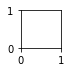

In [141]:
for i in range(35):
    plt.subplot(5,7,i+1)
    h = df.pixels
    h = [int(j) for j in h[j].split()]
    h = np.array(h).reshape([48,48])
    plt.imshow(h)
plt.show